In [1]:
import requests
r = requests.get(url="http://isp.uv.es/projects/cdc/GEE_CLOUDS/locations_splits.json")
locations=r.json()

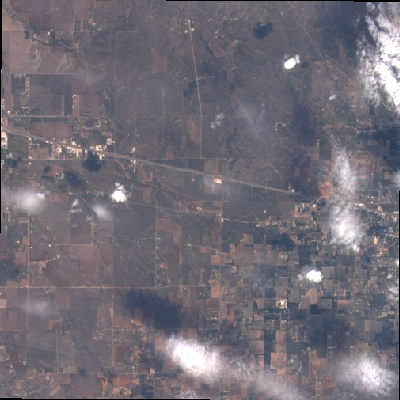

In [3]:
import ee
from datetime import datetime
from IPython.display import Image, display,HTML
from ee_ipl_uv import multitemporal_cloud_masking
from ee_ipl_uv import download
import os

ee.Initialize()


# Select image to remove clouds
image_index = "LC80290372013257LGN00"
split = "013_011"

image_predict_clouds = ee.Image('LANDSAT/LC8_L1T_TOA_FMASK/'+image_index)

# Select region of interest (lng,lat)
pol = [[p[1],p[0]] for p in locations["LC80290372013257LGN00"]["013_011"][0]]

region_of_interest = ee.Geometry.Polygon(pol)
datetime_image = datetime.utcfromtimestamp(image_predict_clouds.get("system:time_start").getInfo()/1000).strftime("%Y-%m-%d %H:%M:%S")
imageRGB = image_predict_clouds.visualize(max=.3,bands=["B4","B3","B2"])
image_file_original = download.MaybeDownloadThumb(imageRGB.clip(region_of_interest),
                                                  params={"dimensions": "400x400"})
display(Image(image_file_original),
       HTML("<center>Landsat 8 TOA image %s</center>"%datetime_image))

In [4]:
cloud_score_percentile,pred_percentile = multitemporal_cloud_masking.CloudClusterScore(image_predict_clouds,region_of_interest,
                                                                                      method_pred="percentile",
                                                                                       num_images=3)

ground_truth = ee.Image("users/gonzmg88/LANDSAT8_CLOUDS/"+image_index+"_fixedmask")

image_download = image_predict_clouds.addBands(cloud_score_percentile.select(["cluster"],["cloudscore"]))\
                                     .addBands(ground_truth.select(["b1"],["fixedmask"])).clip(region_of_interest).toFloat()

In [5]:
!rm -rf pruebecilla

In [6]:
!mkdir pruebecilla

In [8]:
from ee_ipl_uv import local_image
local_image.ExporteeImage("pruebecilla",image_download.toFloat(),region=pol,
                          properties_ee_img=["system:time_start"])

In [18]:
!cat pruebecilla/info.json

{"bands": ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "BQA", "fmask", "cloudscore", "fixedmask"], "system:time_start": 1379178992961}

In [19]:
import rasterio

rastercillo =  rasterio.open('reproducibility_results/LC80290372013257LGN00/raster.tif')
rastercillo

<open DatasetReader name='reproducibility_results/LC80290372013257LGN00/raster.tif' mode='r'>

In [20]:
rastercillo.crs,rastercillo.transform,rastercillo.shape

(CRS({'init': 'epsg:32614'}), Affine(30.0, 0.0, 333600.0,
        0.0, -30.0, 3684570.0), (517, 518))

In [21]:
banda0 = rastercillo.read(14)
banda0.shape

(517, 518)

In [22]:
banda1 = rastercillo.read(15)

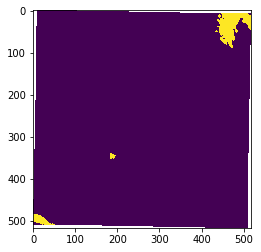

In [23]:
import matplotlib.pyplot as plt

plt.imshow(banda0)

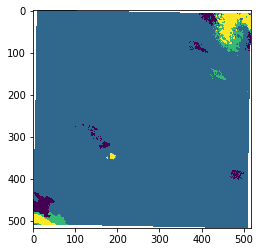

In [24]:
plt.imshow(banda1)

In [25]:
import reproducibility
locations = reproducibility.get_location_splits()
for index_name,v in locations.items():
    for split_name,pol in v.items():
        print(index_name,split_name)
        

LC81590362014051LGN00 006_008
LC81590362014051LGN00 011_009
LC81590362014051LGN00 008_012
LC81590362014051LGN00 001_003
LC81590362014051LGN00 009_009
LC81590362014051LGN00 003_008
LC81590362014051LGN00 014_008
LC81590362014051LGN00 004_010
LC81590362014051LGN00 009_007
LC81590362014051LGN00 009_006
LC81590362014051LGN00 006_002
LC81590362014051LGN00 002_006
LC81590362014051LGN00 012_010
LC81590362014051LGN00 005_002
LC81590362014051LGN00 010_011
LC81590362014051LGN00 000_004
LC81590362014051LGN00 007_010
LC81590362014051LGN00 010_007
LC81590362014051LGN00 003_005
LC81590362014051LGN00 007_005
LC81590362014051LGN00 008_013
LC81590362014051LGN00 003_014
LC81590362014051LGN00 008_011
LC81590362014051LGN00 014_011
LC81590362014051LGN00 008_007
LC81590362014051LGN00 006_005
LC81590362014051LGN00 005_007
LC81590362014051LGN00 006_011
LC81590362014051LGN00 010_004
LC81590362014051LGN00 009_004
LC81590362014051LGN00 011_004
LC81590362014051LGN00 004_006
LC81590362014051LGN00 007_004
LC81590362

LC81820302014180LGN00 010_012
LC81820302014180LGN00 005_013
LC81820302014180LGN00 003_003
LC81820302014180LGN00 012_008
LC81820302014180LGN00 004_008
LC81820302014180LGN00 006_003
LC81820302014180LGN00 012_006
LC81820302014180LGN00 007_001
LC81820302014180LGN00 010_010
LC81820302014180LGN00 007_012
LC81820302014180LGN00 003_009
LC81820302014180LGN00 009_011
LC81820302014180LGN00 004_011
LC81820302014180LGN00 010_001
LC81820302014180LGN00 007_003
LC81820302014180LGN00 002_007
LC81820302014180LGN00 002_009
LC81820302014180LGN00 005_012
LC81820302014180LGN00 007_005
LC81820302014180LGN00 006_011
LC81820302014180LGN00 005_005
LC81820302014180LGN00 009_008
LC81820302014180LGN00 006_012
LC81820302014180LGN00 010_003
LC81820302014180LGN00 009_012
LC81820302014180LGN00 012_002
LC81820302014180LGN00 007_008
LC81820302014180LGN00 001_005
LC80640452014041LGN00 012_004
LC80640452014041LGN00 011_002
LC80640452014041LGN00 014_008
LC80640452014041LGN00 009_007
LC80640452014041LGN00 009_006
LC80640452